In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

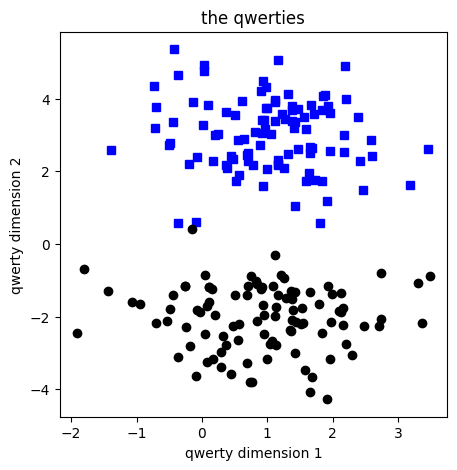

In [3]:
nPerClust = 100
blur = 1

A = [1,3]
B = [1,-2]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('the qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [65]:
def createANNModel(learningRate):
    model = nn.Sequential(
        nn.Linear(2,16),
        #nn.ReLU(),
        nn.Linear(16, 1),
        #nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid(),
    )

    
    lossfunc = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    return model, lossfunc, optimizer

In [63]:
learningRate = 0.01
numEpochs = 100


def trainTheModel(ANNModel):
    losses = torch.zeros(numEpochs)

    for i in range(numEpochs):
        yHat = ANNModel(data)

        loss = lossfunc(yHat, labels)
        losses[i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNModel(data)
    totalacc = 100*torch.mean(((predictions>0.5)==labels).float())

    return losses, predictions, totalacc

In [62]:
model, lossfunc, optimizer = createANNModel(0.1)
losses, predictions, totalacc = trainTheModel(model)

Final accuracy: 99.5%


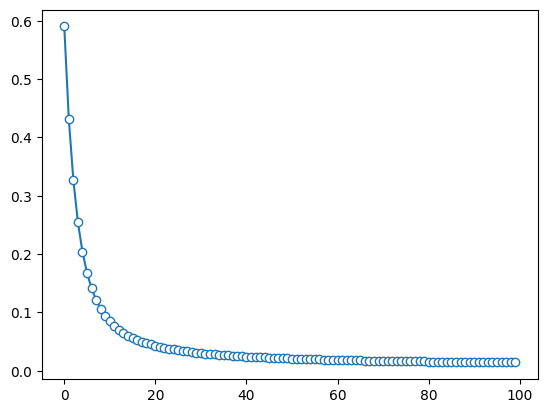

In [67]:
print("Final accuracy: %g%%" %totalacc)
plt.plot(losses.detach(), 'o-', markerfacecolor='w')

In [68]:
learningRates = np.linspace(0.01, 0.1, 50)
numEpochs = 100
accByLR = []
totalLosses = np.zeros((len(learningRates), numEpochs))

for i,lr in enumerate(learningRates):
    model, lossfunc, optimizer = createANNModel(lr)
    losses, predictions, totalacc = trainTheModel(model) 

    totalLosses[i, :] = losses.detach()
    accByLR.append(totalacc)

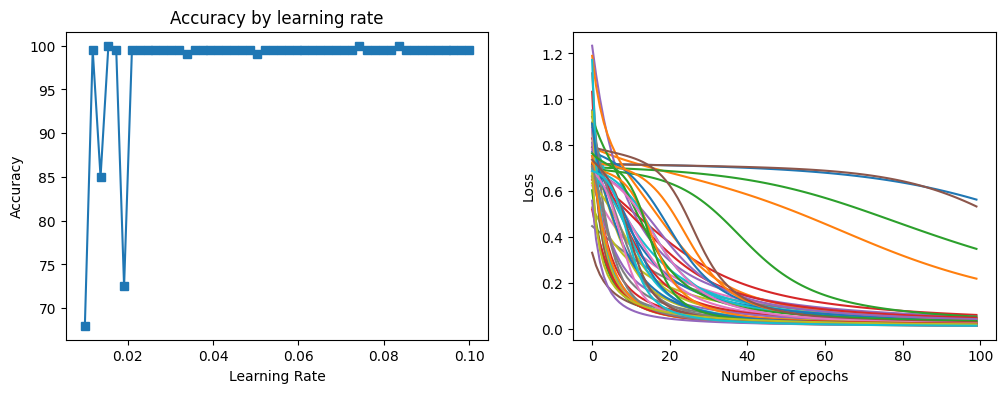

In [69]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(learningRates, accByLR,'s-')
ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")

ax[1].plot(totalLosses.T)
ax[1].set_xlabel("Number of epochs")
ax[1].set_ylabel("Loss")


plt.show()

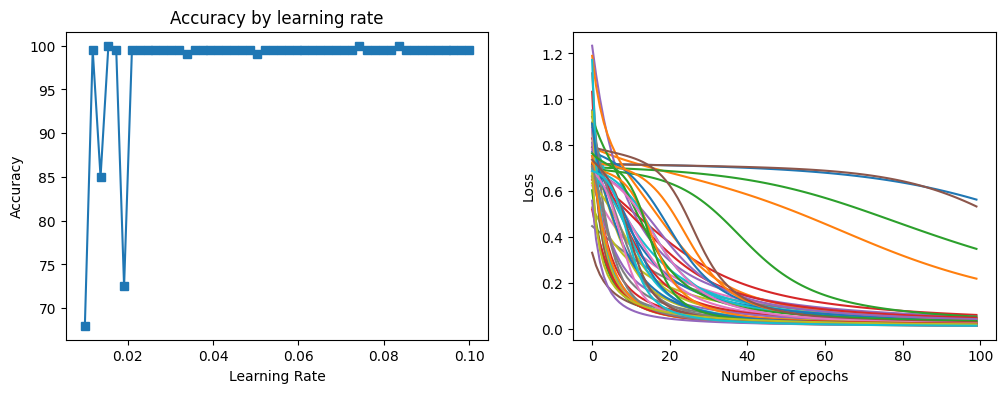

In [70]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(learningRates, accByLR,'s-')
ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")

ax[1].plot(totalLosses.T)
ax[1].set_xlabel("Number of epochs")
ax[1].set_ylabel("Loss")


plt.show()